# PCA Decomposition

Consider and example: We have a dataset composed by a set of properties from cars. These properties describe each car by its size, color, circularity, compactness, radius, number of seats, number of doors, size of trunk and so on. However, many of these features will measure related properties and so will be redundant. Therefore, we should remove these redundancy and describe each car with less properties. This is exactly what PCA aims to do.PCA does not take information of classes into account, it just look at the variance of each feature because is reasonable assumes that features that present high variance are more likely to have a good split between classes.

We have the dataset from [PRML competition](https://www.kaggle.com/c/prml-competition-2/data), we will reduce those features using PCA and then train model on new features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import norm, skew,boxcox            ## lib for skewness and their transformation
from sklearn.linear_model import Lasso 
import matplotlib.pyplot as plt
import plotly.express as px
from xgboost import XGBClassifier                      ## xgboost lib for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [2]:
#reading the features
data=pd.read_csv('TrainFeatures.txt',delim_whitespace=True, error_bad_lines=False, warn_bad_lines=False, header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.054601,0.081263,0.059568,0.051271,0.025327,0.049335,0.043473,0.012733,0.017471,0.027862,...,0.036021,0.012184,0.015615,0.020774,0.016848,0.010128,0.039098,0.039403,0.046370,0.037825
1,0.036666,0.044096,0.059961,0.036890,0.003567,0.011442,0.055475,0.006572,0.004405,0.008915,...,0.071021,0.014587,0.002804,0.020598,0.050637,0.025777,0.051110,0.058530,0.066620,0.063733
2,0.048182,0.058534,0.058981,0.055025,0.046223,0.082044,0.069817,0.059398,0.049342,0.087248,...,0.081197,0.065757,0.025368,0.101040,0.054829,0.033116,0.053244,0.067618,0.056515,0.050420
3,0.044171,0.057697,0.076900,0.066527,0.004572,0.044242,0.067696,0.035497,0.004583,0.041180,...,0.106596,0.055443,0.008428,0.042934,0.071932,0.028960,0.035406,0.065744,0.076205,0.040777
4,0.096727,0.171777,0.098509,0.086158,0.080564,0.166029,0.071899,0.122354,0.079392,0.154493,...,0.071070,0.046199,0.025432,0.050542,0.081548,0.042556,0.084683,0.051664,0.098646,0.059990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12991,0.045130,0.056552,0.077261,0.053769,0.019038,0.032550,0.069282,0.052403,0.017836,0.040737,...,0.067901,0.026178,0.022280,0.030451,0.062402,0.023501,0.040036,0.059558,0.058923,0.045163
12992,0.051035,0.077440,0.074185,0.067952,0.005537,0.038383,0.038657,0.035949,0.002140,0.022903,...,0.023139,0.022558,0.007022,0.028639,0.026539,0.019320,0.033843,0.036224,0.058692,0.041957
12993,0.032302,0.040805,0.059222,0.068802,0.039859,0.136177,0.137828,0.073116,0.014448,0.056863,...,0.075376,0.033835,0.014801,0.045601,0.067986,0.022551,0.057772,0.051609,0.050732,0.065722
12994,0.040690,0.061329,0.059591,0.039642,0.004502,0.042979,0.045292,0.004863,0.011859,0.071468,...,0.025057,0.010157,0.038941,0.130093,0.073120,0.048510,0.041076,0.071209,0.082473,0.041150


In [4]:
labels=pd.read_csv('TrainClasses.txt',names=['label']) #reading target classes

In [5]:
labels.label.unique()

array([ 87,  29,  50,   7,  71,  14,   2,  11,   3,  59,  17,  49,  37,
        69,   5,  38,  86,  24,   6,  98,  97,  12,  36,  19,  21,  25,
        22,  81,  95,  23,  73,  13,  20,  46,  83,  88,  61,  57,  66,
        43,  45,  60,  63,  10,  16,  41,   9,  84,  51,  18,  67,  75,
        35,  44,  47,  76,  27,  96,  64,   4,  77,  78,  54,  94,  26,
        42,   1,  99,  52,  91,  34,  72,  93,  74,  85,  70,  92,  31,
        32,  90,  39,  79,  40,  68,  65,  62,  58,  28,  30,  53,  89,
        56,  15, 100,   8,  55,  33,  82,  80,  48], dtype=int64)

Changing the range of labels from 1-100 to 0-99.

In [6]:
labels.label-=1

Their are total 100 classes as our target variable.

Now lets look at the null values first.

In [7]:
data.isnull().sum().sum()

0

From above we can see their are no null values available in the dataset. 

Let's check the frequency of classes we have.

<AxesSubplot:>

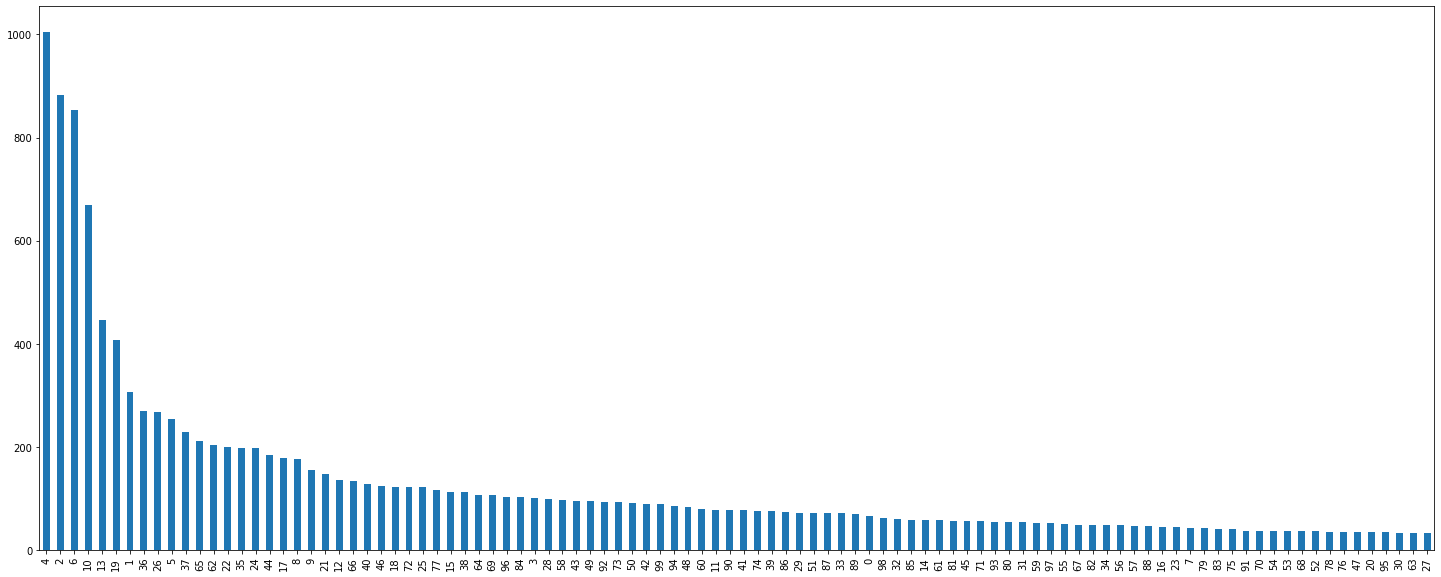

In [8]:
labels.label.value_counts().plot(figsize=(25,10),kind='bar')

Most of the sample points are from classes : 5,3,7,11,14,20.

Now lets look at the min and max values of features

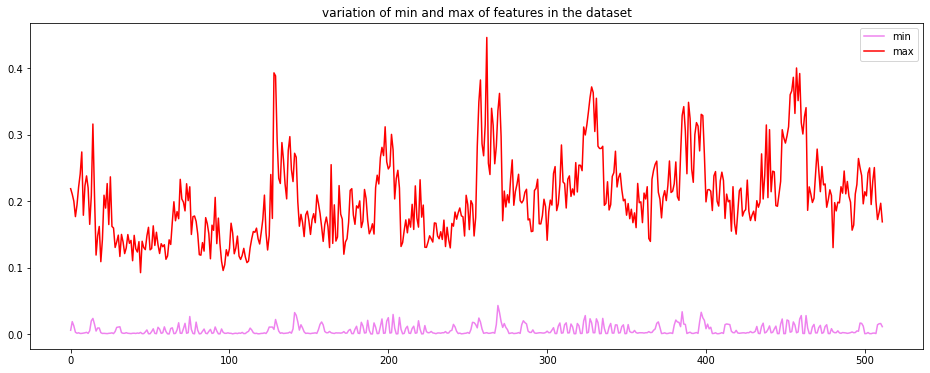

In [9]:
plt.figure(figsize=(16,6))
plt.title("variation of min and max of features in the dataset")
plt.plot(data.min(axis=0),color="violet", label='min')
plt.plot(data.max(axis=0),color="red", label='max')
plt.legend()
plt.show()

Almost all the min values is negative

As all the datapoints are numerical ,so lets check at the deviation and mean of the datapoints.

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


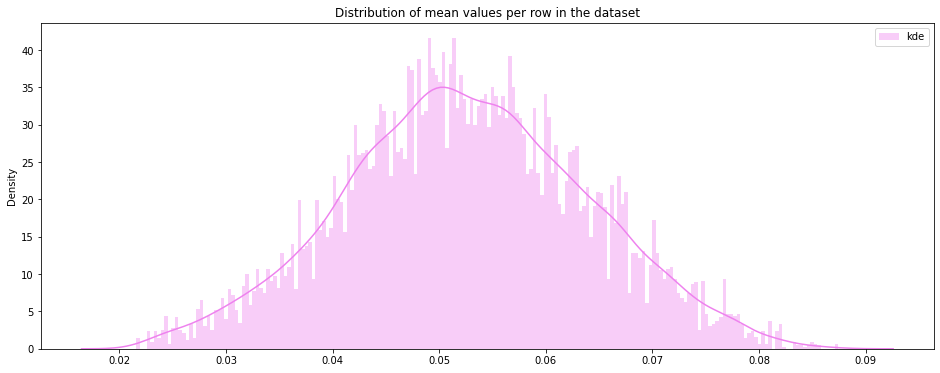

In [10]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the dataset")
sns.distplot(data.mean(axis=1),color="violet", kde=True,bins=200 ,label='kde')
plt.legend()
plt.show()

From above density plot we can see the bell kind of structure which shows mean of mean of rows is normal distributed.

Now let's see the mean ditribution of features.

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


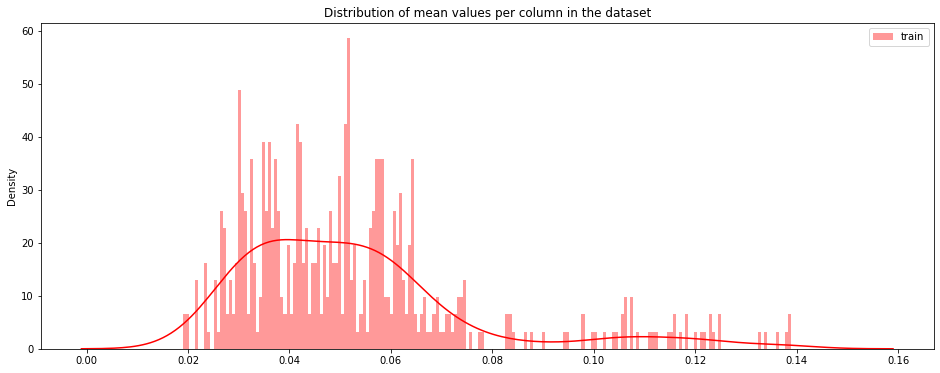

In [11]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the dataset")
sns.distplot(data.mean(axis=0),color="r", kde=True,bins=200, label='train')

plt.legend();plt.show()

If we see closely , then we can observe that mean of the features slightly on the left , which is positively skewed for the mean distribution of features , so let's check at their standard deviation also. 

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


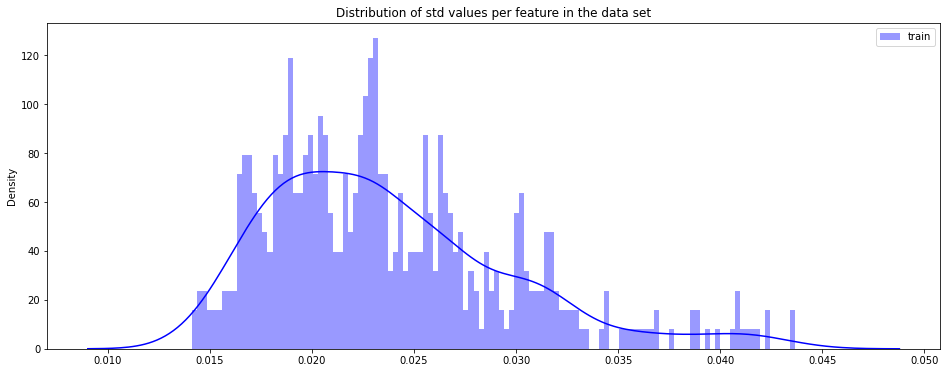

In [12]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per feature in the data set")
sns.distplot(data.std(axis=0),color="blue",kde=True,bins=120, label='train')

plt.legend(); plt.show()

The standard deviation of data is also positively skewed ,we need to check at the skewness of features also ,as they would not perform well while modeling.

### What is skewness?
Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

<img src='skew.png'/>

So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models.So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution.Transformation is the replacement of a variable by the function of that variable. We can replace our skewed feature, with the root or logarithm of it. As we have seen their are negative values also in the dataset , root and log transform cannot handle those negative values.

I am using [boxcox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) transoformation for this, if the skewness is greater than 1 then we transform it.


In [13]:
skewed_feats = data.apply(lambda x: skew(x)).sort_values(ascending = False)  ## findign the skewness for each feature
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
496,2.221308
400,2.052566
128,2.033161
412,1.972756
428,1.952433
...,...
154,0.404804
26,0.393345
150,0.382434
246,0.370771


In [14]:
## transforming data if the skewness is greater than 1
df=data.copy()
for i,val in skewness.iterrows():
    # print(i,val['skewed'])
    if(val['skewed']>=1):
        data[i],_= boxcox(data[i])

### Feature selection
Now lets find the features which are most usefull for training the model .

<AxesSubplot:>

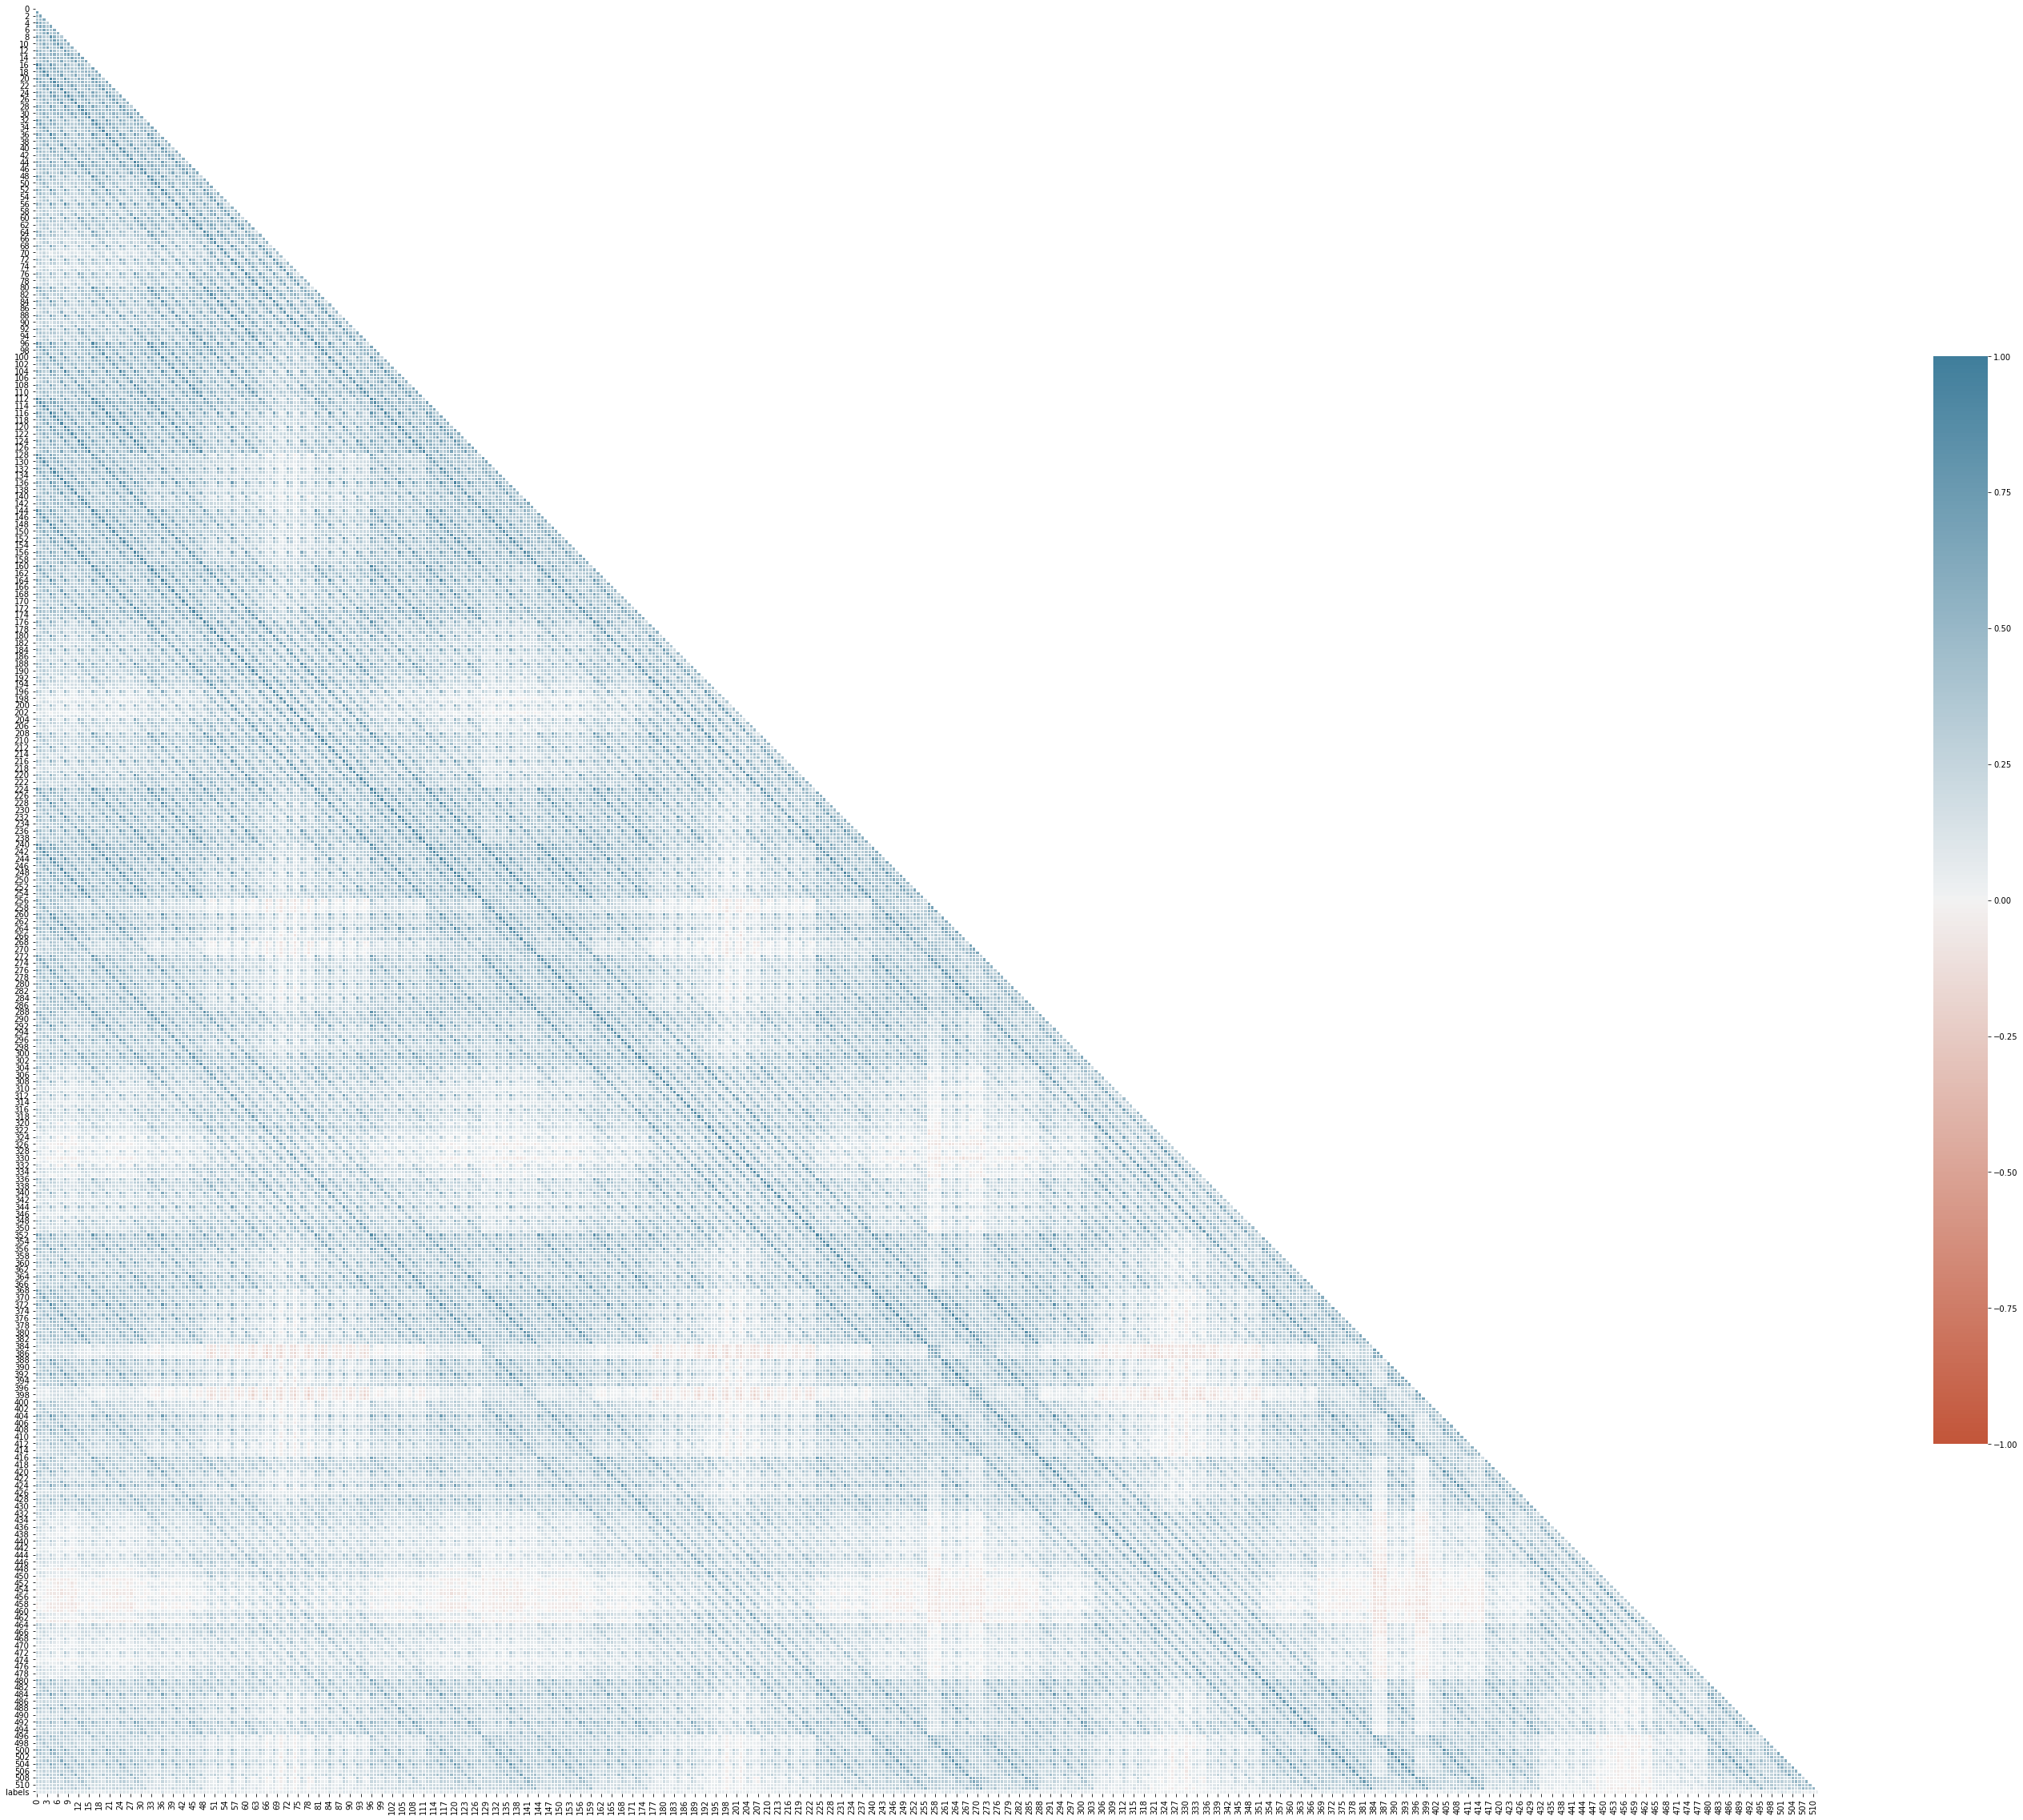

In [15]:
#lets plot heatmap for correlation
df=data.copy()
df['labels']=labels.label
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

from above we cannot look at the correlation of labels invidually because their are many features.<br> So, i am using [Lasso regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) to find best features. The coefficient for features which are more correlated with target labels would have the positive value.

In [16]:
lasso=Lasso(alpha=0.01)
lasso.fit(data,labels) ## fitting the dataset

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129172.16692159884, tolerance: 1101.150152354571
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [17]:
Feature_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data.columns)    ## saving lasso reg coefficient 

In [18]:
Feature_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
346,27.841982
134,24.082825
202,22.040173
204,13.549217
193,12.905700
...,...
203,-17.378686
37,-25.036484
45,-25.964358
33,-36.934764


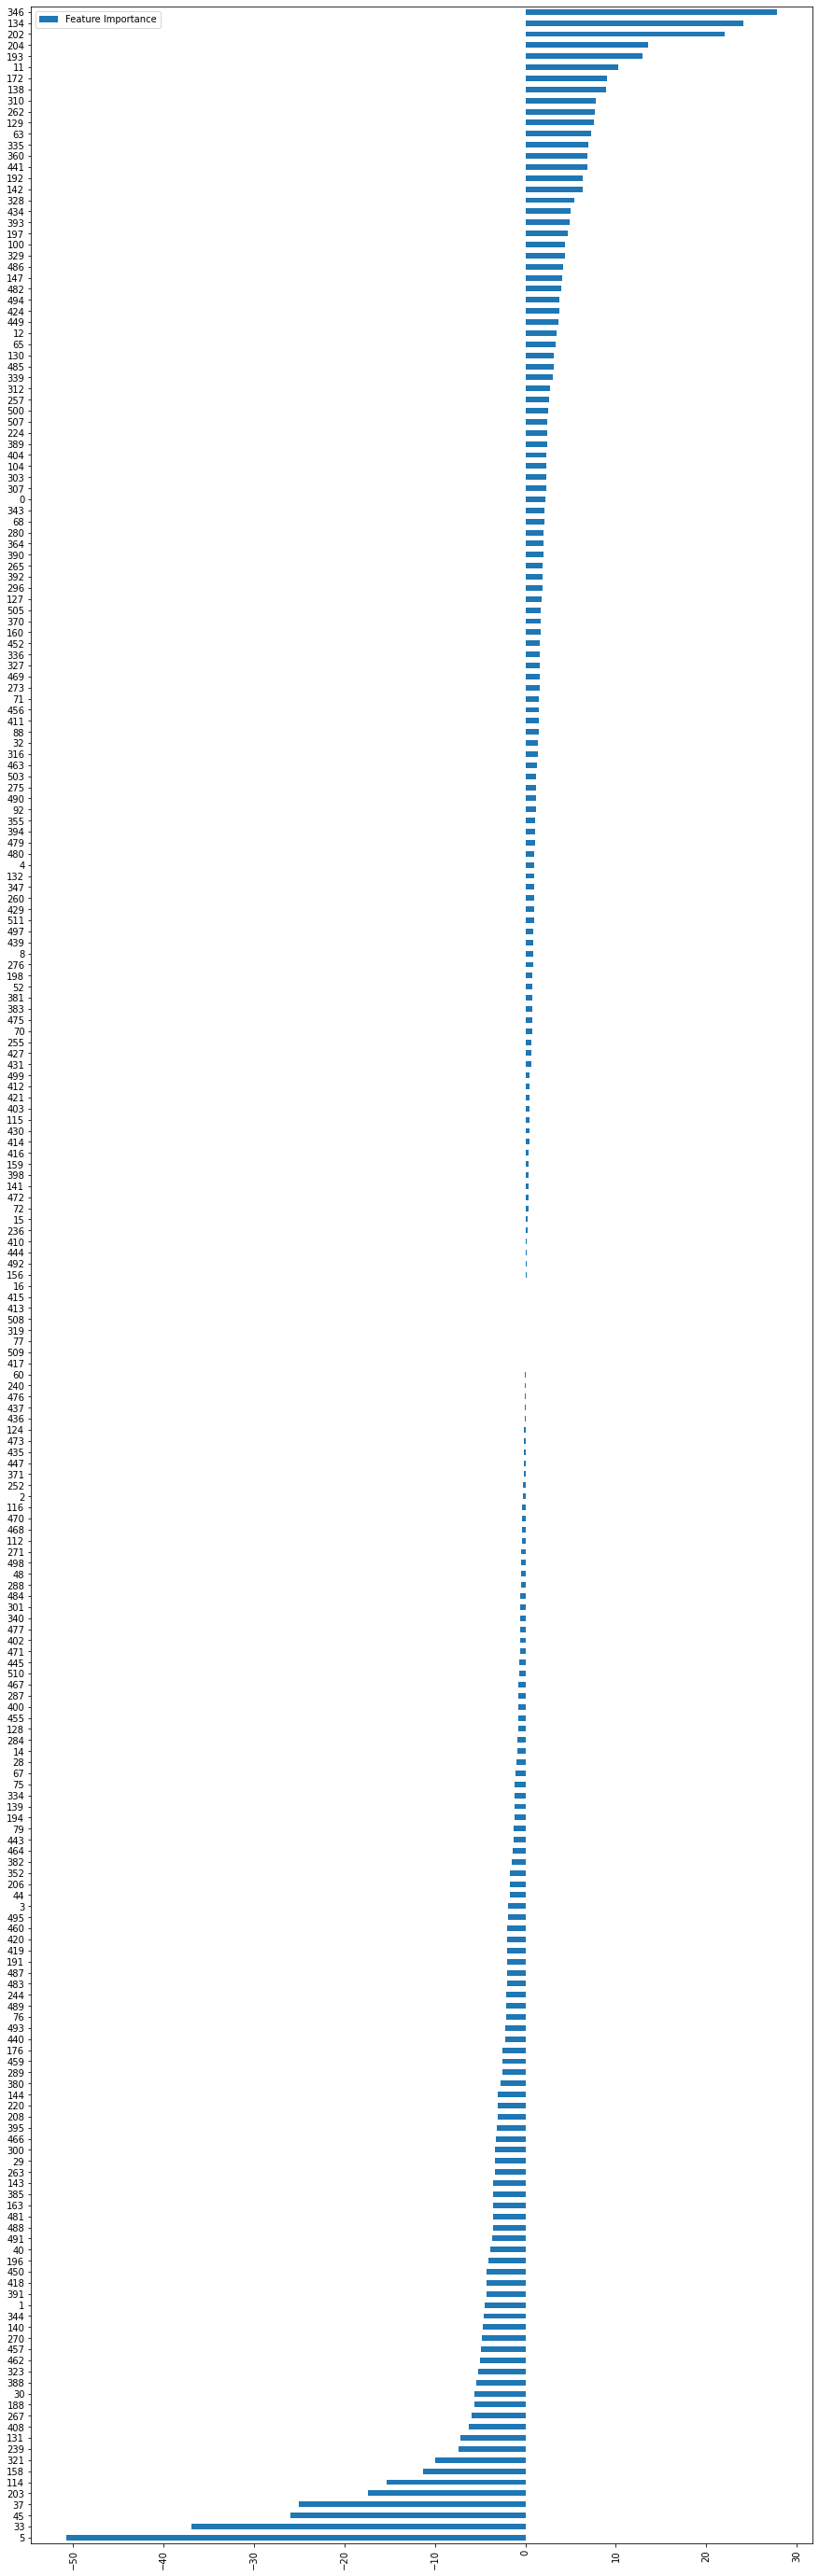

In [19]:
Feature_lasso[Feature_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,50))  #plotting best features for the dataset
plt.xticks(rotation=90)
plt.show()

We can se the best features for training model have positive value and least important feature with negative value.

In [20]:
dt=Feature_lasso.sort_values("Feature Importance",ascending=False)
dt=dt[dt["Feature Importance"]>=1]         ##selecting feature which are most correlated with labels

In [21]:
dcp=pd.DataFrame()             ##saving most important feature into new dataframe
for i,_ in dt.iterrows():
    dcp[i]=data[i]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(dcp,labels,train_size=0.8,random_state=10,stratify=labels)

In [23]:
clf=DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
precision = metrics.accuracy_score(y_pred, y_test) *100
print("Accuracy with Decision Tree :{0:.2f}%".format(precision))

Accuracy with Decision Tree :0.54%


As we can see from above the accuracy is not good.<br>
The penalty (the L1 regularization) of the Lasso regression will enable you to do feature selection by leading to put coefficients equal to 0 in the linear regression. So it lead to select some features Xi and to discard the others.

While PCA is smoother. It will provide vectors that are linear combinations of your initial features X1, X2, …, Xn. Le'ts name these new vectors Y1, Y2, …, Yn (where Y1 is the largest principal component, which means it is the direction that maximizes the variance of the projected data, and Yn the smallest). Thus, you can do feature selection by selecting only Y1, Y2, …, Yp (where p is a positive integer such that p<n). But here, all the Y1, Y2, …, Yp can depend of all the original features X1, X2, …, Xn. That was not the case with the feature selection done with the Lasso regression as the selected features where just a subset of the original features X1, X2, …, Xn.

#### How PCA works
In order to decrease the dimensionality of our data from  n  to  k  with  k≤n , we sort our list of axes in order of decreasing dispersion and take the top- k  of them.

We begin by computing the dispersion and the covariance of the initial features. This is usually done with the covariance matrix. According to the covariance definition, the covariance of two features is computed as follows:<Br>
$cov(X_i,X_j)=E[(X_i−μ_i)(X_j−μ_j)]=E[X_iX_j]−μ_iμ_j$,
 
where  $μ_i$  is the expected value of the  ith feature. It is worth noting that the covariance is symmetric, and the covariance of a vector with itself is equal to its dispersion.

Therefore the covariance matrix is symmetric with the dispersion of the corresponding features on the diagonal. Non-diagonal values are the covariances of the corresponding pair of features. In terms of matrices where  X  is the matrix of observations, the covariance matrix is as follows:

$Σ=E[(X−E[X])(X−E[X]).T]$

Matrices, as linear operators, have eigenvalues and eigenvectors. They are very convenient because they describe parts of our space that do not rotate and only stretch when we apply linear operators on them; eigenvectors remain in the same direction but are stretched by a corresponding eigenvalue. Formally, a matrix  M  with eigenvector  wi  and eigenvalue  λi  satisfy this equation:  Mwi=λiwi .

The covariance matrix for a sample  X  can be written as a product of  X.T,X . According to the Rayleigh quotient, the maximum variation of our sample lies along the eigenvector of this matrix and is consistent with the maximum eigenvalue. Therefore, the principal components we aim to retain from the data are just the eigenvectors corresponding to the top- k  largest eigenvalues of the matrix.

Projecting 512-dimensional data to 2D


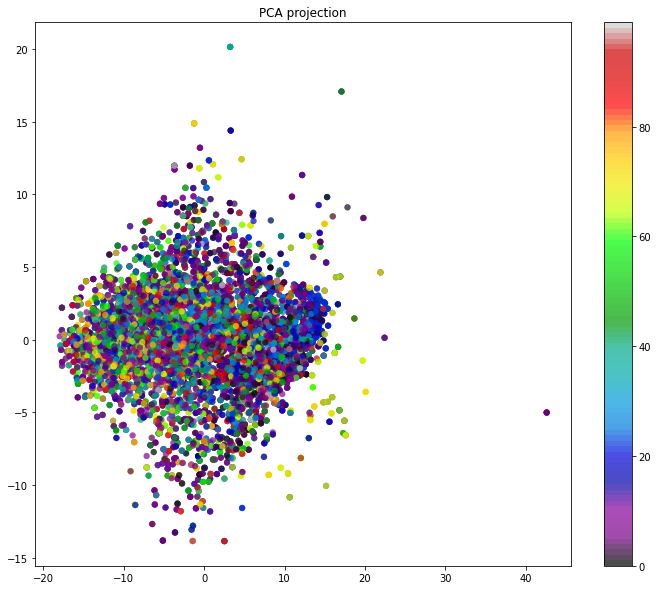

In [24]:
pca =PCA(n_components=3)   ## visualising for 3 PCA components
X_reduced = pca.fit_transform(data)

print('Projecting %d-dimensional data to 2D' % data.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels.label, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 100))
plt.colorbar()
plt.title('PCA projection');

In [25]:
print("3D plot for 3 PCA components")
fig = px.scatter_3d( x=X_reduced[:, 0],y= X_reduced[:, 1], z=X_reduced[:, 2],color=labels.label)
fig.show()

3D plot for 3 PCA components


But how do we choose the no. of components ? <br>
Don't choose the number of components manually,we can use the option that allows you to set the variance of the input that is supposed to be explained by the generated components.
We can scale the data to the range between 0 and 1 before using PCA!
Typically, we want the explained variance to be between 95–99%.

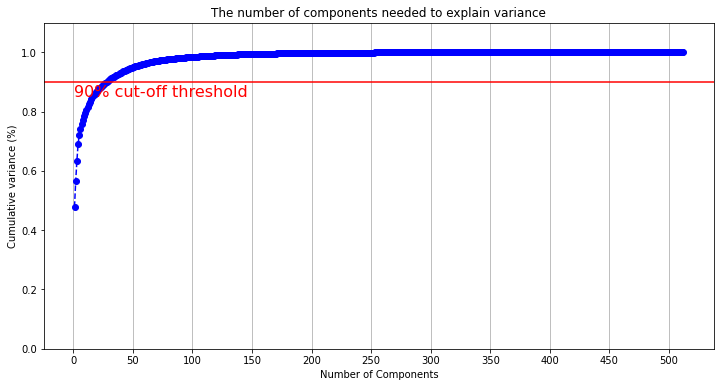

In [26]:
pca = PCA().fit(data) 
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 513, step=1)
y = np.cumsum(pca.explained_variance_ratio_)  #getting the cumulative  sum of explained variance

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 512, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
#plot the threshold at 95%
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

From above we can see that at 90% threshold cut of we will take number of component=40. 

In [51]:
pca = PCA(n_components=41)  
X=pca.fit_transform(data)  ## transforming data

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,labels,train_size=0.85,stratify=labels) #splitting the data
acc={}            ##dict for saving model

Now we would train our model and find the model with best accuracy.

We would train our model with:
1. [DecisionTree](https://scikit-learn.org/stable/modules/tree.html#classification)
2. [SVM](https://scikit-learn.org/stable/modules/svm.html)
3. [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
4. [Randomforest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
5. [Xgboost classifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM).

In [53]:
## training with decision tree
clf=DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
precision = metrics.accuracy_score(y_pred, y_test) *100
acc['decisiontree']=precision
print("Accuracy with Decision Tree :{} ".format(precision))

Accuracy with Decision Tree :0.5641025641025641 


In [54]:
#training with SVM
svm = SVC(kernel='rbf',probability=True)
svm.fit(x_train, y_train) 
y_pred = svm.predict(x_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
acc['svm']=precision
train_precision = metrics.accuracy_score(svm.predict(x_train), y_train) * 100
print("Test accuracy with SVM: {0:.2f}%".format(precision))

print("Train accuracy with SVM: {0:.2f}%".format(train_precision))


C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Test accuracy with SVM: 13.23%
Train accuracy with SVM: 16.74%


In [55]:
#training with KNN
KNN =KNeighborsClassifier(n_neighbors=30,n_jobs=-1)
KNN.fit(x_train, y_train) 
y_pred = KNN.predict(x_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
acc['knn']=precision
train_precision = metrics.accuracy_score(KNN.predict(x_train), y_train) * 100
print("test accuracy with KNN: {0:.2f}%".format(precision))

print("train accuracy with KNN: {0:.2f}%".format(train_precision))

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



test accuracy with KNN: 9.74%
train accuracy with KNN: 16.08%


In [56]:
##training with random forest
rf =RandomForestClassifier()
rf.fit(x_train, y_train) 

y_pred = rf.predict(x_test)
precision = metrics.accuracy_score(y_pred, y_test) * 100
acc['randomforest']=precision
train_precision = metrics.accuracy_score(rf.predict(x_train), y_train) * 100
print("Test accuracy with random forest: {0:.2f}%".format(precision))
print("train accuracy with KNN: {0:.2f}%".format(train_precision))

<ipython-input-56-66325e0ad762>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Test accuracy with random forest: 1.13%
train accuracy with KNN: 39.58%


In [57]:
##training with xgboost classifier
XGB = XGBClassifier(n_estimators=5,max_depth = 3,learning_rate=0.01,n_jobs=-1)
XGB.fit(x_train, y_train)
y_pred_xgb = XGB.predict(x_test)
acc_xgb = metrics.accuracy_score(y_test, y_pred_xgb)*100
train_precision = metrics.accuracy_score(rf.predict(x_train), y_train) * 100
acc['xgb']=precision
print("XGBoost Model test acc : ",acc_xgb,"%")
print("XGBoost Model train acc: {0:.2f}%".format(train_precision))
# print("XGBoost Model Cm : ",cm_xgb)

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\Tushar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[22:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model test acc :  11.333333333333332 %
XGBoost Model train acc: 39.58%


(0.0, 100.0)

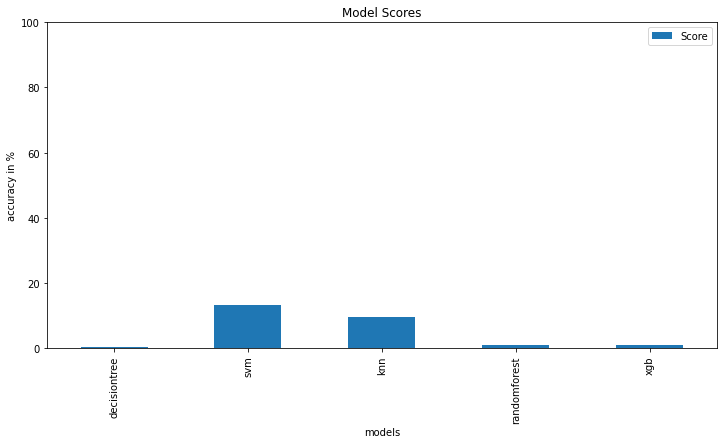

In [58]:
results = pd.DataFrame.from_dict(acc,orient='index')
results.columns=["Score"] 

results.plot(kind="bar",title="Model Scores")
axes = plt.gca()
axes.set_ylabel("accuracy in %")
axes.set_xlabel("models")
axes.set_ylim([0.0,100])